In [1]:
import numpy as np
from basicpy import BaSiC
from scipy.ndimage import zoom
import zarr
from numcodecs import GZip 

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def transform(images, f, d=None):
    if d is not None:
        images_transformed = (np.clip(images-d[np.newaxis],0,None))/f[np.newaxis]
    else:
        images_transformed = images/f[np.newaxis]
        
    return images_transformed

In [3]:
path = "/u/scratch/f/f7xiesnm/sparse06/dataset.n5"
outpath = "/u/home/f/f7xiesnm/project-zipursky/data/hold/sparse06/r1_test_flatfield_v6.n5"
zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')

In [4]:
print(zarr_data[f'/setup0/timepoint0/s0'].shape)
print(zarr_data[f'/setup0/timepoint0/s1'].shape)
print(zarr_data[f'/setup0/timepoint0/s2'].shape)
print(zarr_data[f'/setup0/timepoint0/s3'].shape)
print(zarr_data[f'/setup0/timepoint0/s4'].shape)

(2837, 1920, 1920)
(2837, 960, 960)
(1418, 480, 480)
(709, 240, 240)
(354, 120, 120)


In [5]:
images_raw = np.vstack([
    zarr_data[f'/setup1/timepoint0/s4'][...],
    zarr_data[f'/setup2/timepoint0/s4'][...],
    zarr_data[f'/setup3/timepoint0/s4'][...],
    
    zarr_data[f'/setup6/timepoint0/s4'][...],
    zarr_data[f'/setup7/timepoint0/s4'][...],
    zarr_data[f'/setup8/timepoint0/s4'][...],
    
    zarr_data[f'/setup11/timepoint0/s4'][...],
    zarr_data[f'/setup12/timepoint0/s4'][...],
    zarr_data[f'/setup13/timepoint0/s4'][...],
    
    zarr_data[f'/setup16/timepoint0/s4'][...],
    zarr_data[f'/setup17/timepoint0/s4'][...],
    zarr_data[f'/setup18/timepoint0/s4'][...],
])
images_raw.shape

(4248, 120, 120)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pywt

from skimage import (
    data, restoration, util
)


# def plot_result(image, background):
#     fig, ax = plt.subplots(nrows=1, ncols=3)

#     ax[0].imshow(image, cmap='gray')
#     ax[0].set_title('Original image')
#     ax[0].axis('off')

#     ax[1].imshow(background, cmap='gray')
#     ax[1].set_title('Background')
#     ax[1].axis('off')

#     ax[2].imshow(image - background, cmap='gray')
#     ax[2].set_title('Result')
#     ax[2].axis('off')

#     fig.tight_layout()


# image = data.coins()

# background = restoration.rolling_ball(image)

# plot_result(image, background)
# plt.show()

In [7]:
images = images_raw.copy()
dx = np.percentile(images, 1, axis=0)
images = np.clip(images.astype(np.float16) - dx, 0, 1000).astype(np.uint16)
ff0 = np.percentile(images, 99, axis=0)

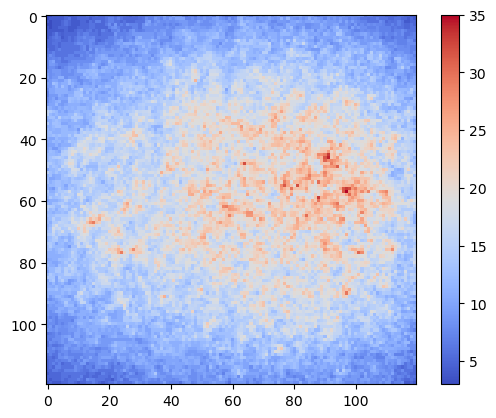

In [8]:
g = plt.imshow(ff0, cmap='coolwarm')
plt.colorbar(g)

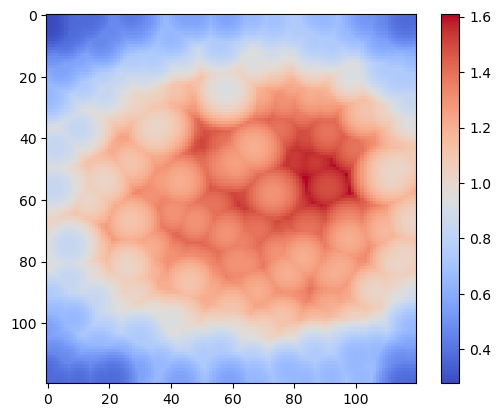

In [9]:
bg = restoration.rolling_ball(ff0, radius=20)
ff = bg / np.mean(bg)
g = plt.imshow(ff, cmap='coolwarm')
plt.colorbar(g)

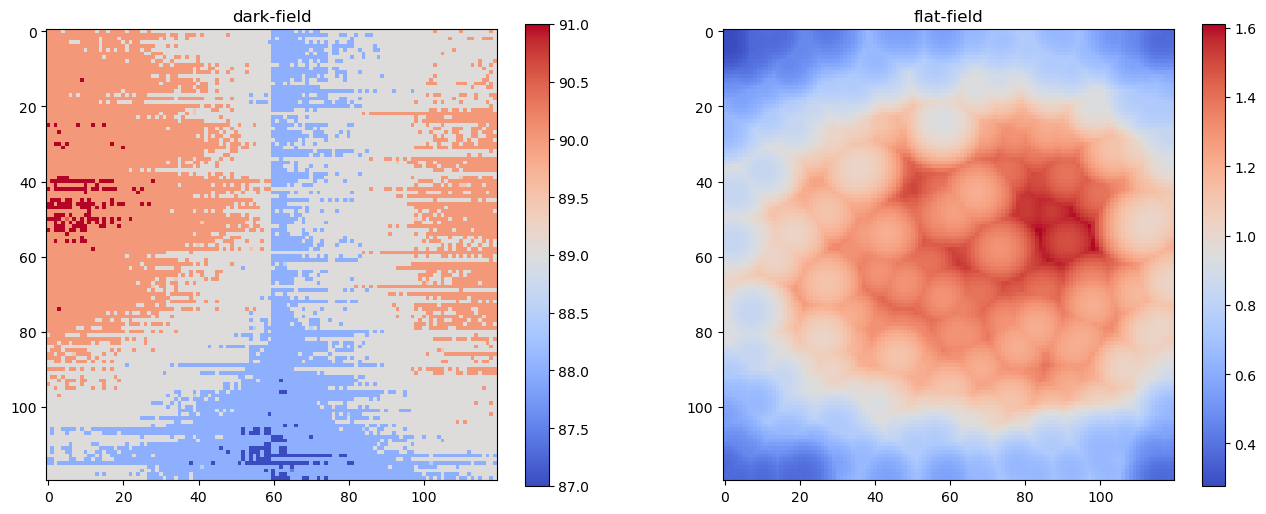

In [10]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(dx, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [11]:
import tifffile
outdir = '/u/home/f/f7xiesnm/project-zipursky/easifish/results/sparse06_r1c0_flatfield'
!mkdir -p $outdir

tifffile.imwrite(outdir+'/darkfield_rb.tiff', dx)
tifffile.imwrite(outdir+'/flatfield_rb.tiff', ff)

In [13]:
!ls $outdir
dx = tifffile.imread(outdir+'/darkfield_rb.tiff')
ff = tifffile.imread(outdir+'/flatfield_rb.tiff')
dx, ff

darkfield_rb.tiff  darkfield.tiff  flatfield_rb.tiff  flatfield.tiff


(array([[90., 90., 90., ..., 89., 90., 89.],
        [90., 90., 90., ..., 89., 89., 89.],
        [90., 90., 90., ..., 90., 90., 89.],
        ...,
        [89., 89., 89., ..., 89., 89., 89.],
        [89., 89., 89., ..., 89., 89., 89.],
        [89., 89., 89., ..., 89., 88., 89.]]),
 array([[0.27775953, 0.27775953, 0.28007564, ..., 0.37266215, 0.37034604,
         0.37034604],
        [0.27775953, 0.28007564, 0.28239466, ..., 0.37034604, 0.37266215,
         0.37034604],
        [0.28007564, 0.27775953, 0.28007564, ..., 0.37034604, 0.37266215,
         0.37266215],
        ...,
        [0.37266215, 0.37266215, 0.37498117, ..., 0.37962795, 0.38195575,
         0.37962795],
        [0.37266215, 0.37034604, 0.37266215, ..., 0.37266215, 0.37498117,
         0.37266215],
        [0.37034604, 0.37266215, 0.37034604, ..., 0.37034604, 0.37266215,
         0.37034604]]))